# Importiere Daten


In [142]:

# import os,sys
import numpy as np
import pandas as pd
import geopandas as gp
import xarray as xr
import datetime
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
# import subprocess


## Funktionen definieren

In [143]:
def select_every_12th_with_start(arr, start_index):
    if start_index < 1 or start_index > 12:
        raise ValueError("Start index must be between 1 and 11")

    selected_elements = []
    for i in range(start_index - 1, len(arr), 12):
        selected_elements.append(arr[i])
    
    return selected_elements

def linear_reg(x, m, t):
    return m*x + t

# def linear_reg2(x, slope, intercept):
#     # Convert datetime64 values to timestamps (numerical representation)
#     x_timestamps = np.array([(timestamp - np.datetime64('1968-04-16T00:00:00.000000000')) / np.timedelta64(1, 's') for timestamp in x])
#     return slope * x_timestamps + intercept

# def linear_reg3(x, slope, intercept):
#     # Convert datetime64 values to timestamps (numerical representation)
#     reference_time = x[0]
#     x_timestamps = np.array([(timestamp.astype("float64") - reference_time.astype("float64")) / np.timedelta64(1, 's') for timestamp in x])
#     return slope * x_timestamps + intercept

def generate_counting_array(length):
    return np.arange(length)


## Daten importieren

In [144]:
# File paths
TMin_file = 'data/cru_ts4.07.1901.2022.tmn.dat.nc/cru_ts4.07.1901.2022.tmn.dat.nc'
TMax_file = 'data/cru_ts4.07.1901.2022.tmx.dat.nc/cru_ts4.07.1901.2022.tmx.dat.nc'
TAvg_file = 'data\cru_ts4.07.1901.2022.tmp.dat.nc\cru_ts4.07.1901.2022.tmp.dat.nc'

# Load datasets
TMin = xr.open_dataset(TMin_file)
TMax = xr.open_dataset(TMax_file)
TAvg =  xr.open_dataset(TAvg_file)

## Differenz berechnen

In [145]:
temperature_difference = TMax.tmx - TMin.tmn   # Normale Differenz fü jeden Punkt

In [146]:
#Projeziert auf eine latitude
TMin_Lat = TMin.mean('lon')
TMax_Lat = TMax.mean('lon')
TAvg_Lat = TAvg.mean('lon')

In [147]:
temperature_difference_Lat = TMax_Lat.tmx- TMin_Lat.tmn # Creating lateral difference

In [148]:
# np.count_nonzero(~np.isnan(TMax_Lat.tmx.isel(time = 0)))
# # temperature_difference.isel(time =0,lat = 330, lon = 265)

In [149]:
time_values = TMax['time'].values

## Plots

### Test T-Min

(8294.0, 11338.0)

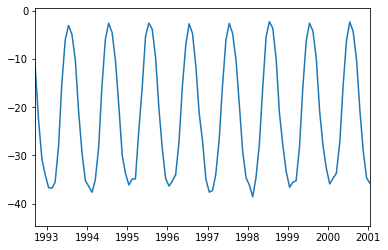

In [150]:
plt.plot(time_values, TMin_Lat.isel(lat = 330).tmn)
plt.xlim(time_values[1100], time_values[1200])

In [151]:
latitude = [60.25,  70.25, 75.25, 77.75, 80.25, 85.25, 89.75]

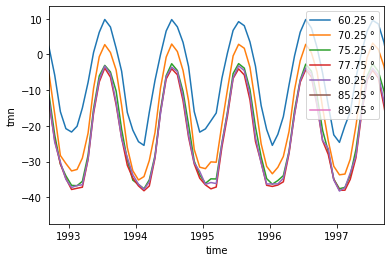

In [152]:
# Plot tmn
for i in latitude:
    plt.plot(time_values, TMin_Lat.sel(lat = str(i)).tmn, label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('tmn')

plt.xlim(time_values[1100], time_values[1160])
plt.legend(loc = 1)

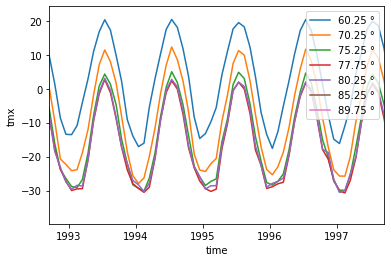

In [153]:
# Plot tmx
for i in latitude:
    plt.plot(time_values, TMax_Lat.sel(lat = str(i)).tmx, label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('tmx')

plt.xlim(time_values[1100], time_values[1160])
plt.legend(loc = 1)

### Delta T

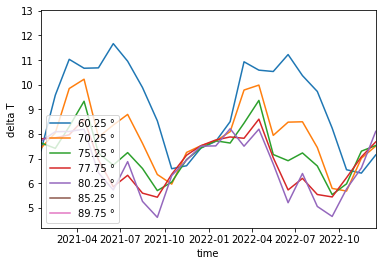

In [154]:
# Plot tmx
for i in latitude:
    plt.plot(time_values, temperature_difference_Lat.sel(lat = str(i)), label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.xlim(time_values[1440], time_values[-1])
plt.legend(loc = 3)

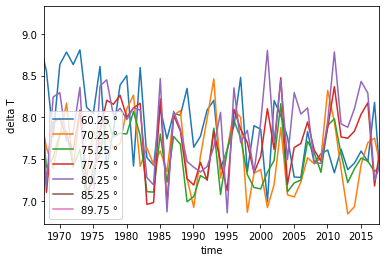

In [155]:
# Nach Jahreszeiten selektiert Januar

for i in latitude:
    plt.plot(time_values[::12], temperature_difference_Lat.sel(lat = str(i))[::12], label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)

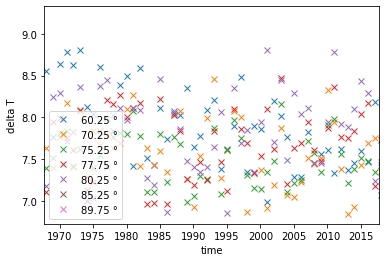

In [156]:
# Nach Jahreszeiten selektiert Januar

for i in latitude:
    plt.plot(time_values[::12], temperature_difference_Lat.sel(lat = str(i))[::12],ls = '', marker = 'x', label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

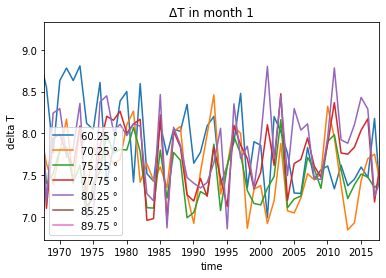

In [157]:
# Nach Jahreszeiten selektiert Januar
month = 1

for i in latitude:
    plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(temperature_difference_Lat.sel(lat = str(i)),month), label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.title('ΔT in month ' + str(month))

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)

plt.tight_layout

In [158]:
# for month in range(1,11):
#     # Nach Jahreszeiten selektiert Januar
#     month = 1

#     for i in latitude:
#         plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(temperature_difference_Lat.sel(lat = str(i)),month), label = str(i)+' °')

#     plt.xlabel('time')
#     plt.ylabel('delta T')

#     plt.title('ΔT in month ' + str(month))

#     plt.xlim(time_values[800], time_values[1400])
#     plt.legend(loc = 3)

#     plt.tight_layout
#     plt.savefig('Delta_T_Month_'+str(month)+'.pdf')

In [159]:
# Assuming you have defined latitude, time_values, and temperature_difference_Lat somewhere above

for month in range(1, 13):
    for i in latitude:
        plt.plot(
            select_every_12th_with_start(time_values, month),
            select_every_12th_with_start(temperature_difference_Lat.sel(lat=str(i)), month),
            label=str(i) + ' °'
        )

    plt.xlabel('time')
    plt.ylabel('delta T')

    plt.title('ΔT in month ' + str(month))

    plt.xlim(time_values[800], time_values[1400])
    plt.legend(loc=3)

    plt.tight_layout()  # Add parentheses here

    plt.savefig('Delta_T_Month_' + str(month) + '.png', dpi = 300)
    plt.clf()  # Clear the plot for the next iteration


<Figure size 432x288 with 0 Axes>

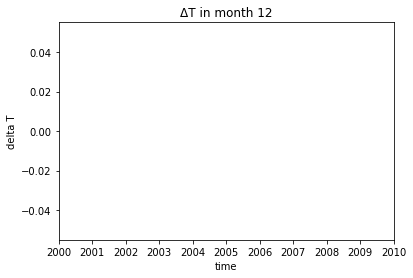

In [160]:
# Assuming you have defined latitude, time_values, and temperature_difference_Lat somewhere above

lat = 80.75
for month in range(1, 13):
    plt.plot(
    select_every_12th_with_start(time_values, month),
    select_every_12th_with_start(temperature_difference_Lat.sel(lat=str(i)), month),
    label=str(i) + ' °'
    )

    plt.xlabel('time')
    plt.ylabel('delta T')

    plt.title('ΔT in month ' + str(month))

    #plt.xlim(time_values[800], time_values[1400])
    #plt.legend(loc=3)

    #plt.tight_layout()  # Add parentheses here

    # plt.savefig('Delta_T_Month_' + str(month) + '.png', dpi = 300)
    # plt.clf()  # Clear the plot for the next iteration


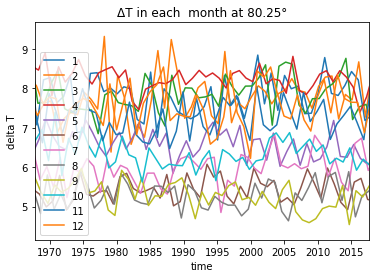

In [161]:
import matplotlib.pyplot as plt
import numpy as np

lat = 80.75

# Define the variables time_values and temperature_difference_Lat here

for month in range(1, 13):
    plt.plot(
        select_every_12th_with_start(time_values, month),
        select_every_12th_with_start(temperature_difference_Lat.sel(lat=str(lat)), month),
        label= str(month)
    )

plt.xlabel('time')
plt.ylabel('delta T')
plt.title('ΔT in each  month at 80.25°')

# Uncomment these lines if needed
plt.xlim(time_values[800], time_values[1400])
plt.legend(loc=3)

# plt.tight_layout()
# plt.savefig(f'Delta_T_Month_{month}.png', dpi=300)
# plt.clf()

plt.show()  # Display the plot


Text(0.5, 1.0, 'Mean Delta T for month at 80.25°')

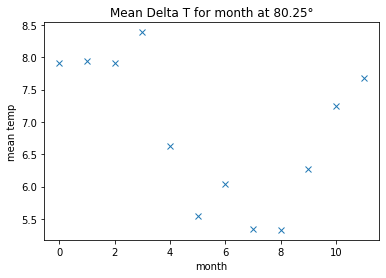

In [162]:
#Calculating the mean values for Delta T
lat = 80.25

mean_month =  np.array([[1, np.mean(select_every_12th_with_start(temperature_difference_Lat.sel(lat=str(lat)), 1))]])

for month in range(2,13):
    mean_month = np.vstack((mean_month,np.array([[month,np.mean(select_every_12th_with_start(temperature_difference_Lat.sel(lat=str(lat)), month))]])) )

plt.plot(mean_month[:,1], ls = '', marker = 'x')

plt.xlabel('month')
plt.ylabel('mean temp')

plt.title('Mean Delta T for month at 80.25°')

Text(0.5, 1.0, 'Mean Delta T for month at 66.25°')

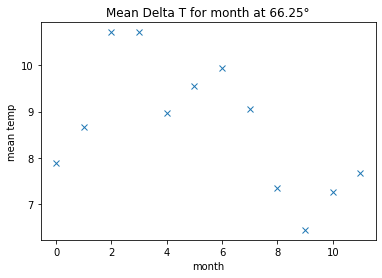

In [163]:
#Calculating the mean values for Delta T
lat = 66.25

mean_month =  np.array([[1, np.mean(select_every_12th_with_start(temperature_difference_Lat.sel(lat=str(lat)), 1))]])

for month in range(2,13):
    mean_month = np.vstack((mean_month,np.array([[month,np.mean(select_every_12th_with_start(temperature_difference_Lat.sel(lat=str(lat)), month))]])) )

plt.plot(mean_month[:,1], ls = '', marker = 'x')

plt.xlabel('month')
plt.ylabel('mean temp')

plt.title('Mean Delta T for month at 66.25°')

### Average Temperature

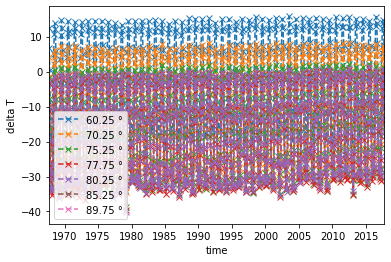

In [164]:
# Nach Jahreszeiten selektiert Januar
month = 1

for i in latitude:
    plt.plot(time_values, TAvg_Lat.sel(lat = str(i)).tmp,ls = '--', marker = 'x', label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)


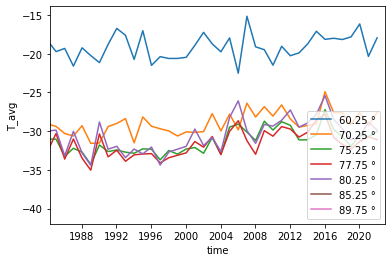

In [165]:
# Nach Jahreszeiten selektiert Januar
month = 1

for i in latitude:
    plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(TAvg_Lat.sel(lat = str(i)).tmp,month), label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('T_avg')

plt.xlim(time_values[1000], time_values[-1])
plt.legend(loc = 4)

### Plot Minimaltemperaturen

### Poly Fit Delta T


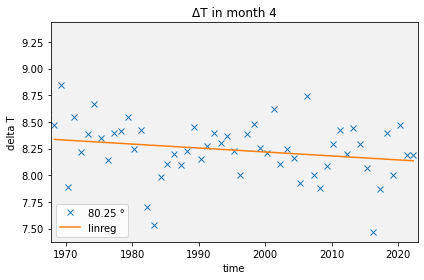

In [200]:
# Nach Jahreszeiten selektiert Januar
month = 4

lat = 80.25


paramet_fit_month4_lat8025, cov_month4_lat8025 = curve_fit(linear_reg, generate_counting_array(len(select_every_12th_with_start(time_values,month)[67:])), select_every_12th_with_start(temperature_difference_Lat.sel(lat = str(lat)),month)[67:])

#print(type(generate_counting_array(len(select_every_12th_with_start(time_values,month)[67:]))[0]))

generate_counting_array(len(select_every_12th_with_start(time_values,month)[67:]))* paramet_fit_month4_lat8025[0]


ydata_temp = linear_reg(generate_counting_array(len(select_every_12th_with_start(time_values,month)[67:])), *paramet_fit_month4_lat8025)
plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(temperature_difference_Lat.sel(lat = str(lat)),month),marker = 'x', ls = '', label = str(lat)+' °')

plt.plot(select_every_12th_with_start(time_values,month)[67:], ydata_temp, label = 'linreg')

#Calculating varriance

VarDeltaT = np.var(select_every_12th_with_start(temperature_difference_Lat.sel(lat = str(lat)),month)[67:]-ydata_temp)


plt.xlabel('time')
plt.ylabel('delta T')

plt.title('ΔT in month ' + str(month))

plt.xlim(time_values[800], time_values[-1])
plt.legend(loc = 3)
# Add a subtle background color
plt.gca().set_facecolor((0.95, 0.95, 0.95))

# Display the plot
plt.tight_layout()
plt.show()

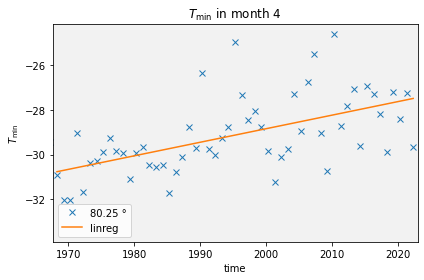

In [204]:
# Parameter setzen

month = 4
lat = 80.25

#Fitten

paramet_fit_month4_lat8025_minTemP, cov_month4_lat8025_MinTemp = curve_fit(linear_reg, generate_counting_array(len(select_every_12th_with_start(time_values,month)[67:])), select_every_12th_with_start(TMin_Lat.sel(lat = str(lat)).tmn,month)[67:])

#Plots vorbereiten

ydata_temp = linear_reg(generate_counting_array(len(select_every_12th_with_start(time_values,month)[67:])), *paramet_fit_month4_lat8025_minTemP)

#Calculating Var

VarTMin = np.var(select_every_12th_with_start(TMin_Lat.sel(lat = str(lat)).tmn,month)[67:] -ydata_temp)

#Plotten

plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(TMin_Lat.sel(lat = str(lat)).tmn,month),marker = 'x', ls = '', label = str(lat)+' °')
plt.plot(select_every_12th_with_start(time_values,month)[67:], ydata_temp, label = 'linreg')

#Formatieren

plt.xlabel('time')
plt.ylabel('$T_{\mathrm{min}}$')

plt.title('$T_{\mathrm{min}}$ in month ' + str(month))

plt.xlim(time_values[800], time_values[-1])
plt.legend(loc = 3)

# Add a subtle background color
plt.gca().set_facecolor((0.95, 0.95, 0.95))

# Display the plot
plt.tight_layout()
plt.show()

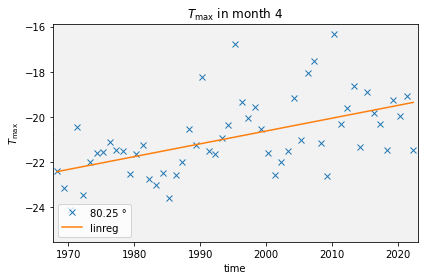

In [206]:
# Parameter setzen

month = 4
lat = 80.25

#Fitten

paramet_fit_month4_lat8025_maxTemP, cov_month4_lat8025_MaxTemp = curve_fit(linear_reg, generate_counting_array(len(select_every_12th_with_start(time_values,month)[67:])), select_every_12th_with_start(TMax_Lat.sel(lat = str(lat)).tmx,month)[67:])

#Plots vorbereiten

ydata_temp = linear_reg(generate_counting_array(len(select_every_12th_with_start(time_values,month)[67:])), *paramet_fit_month4_lat8025_maxTemP)


#Calculating Var

VarTMax = np.var(select_every_12th_with_start(TMax_Lat.sel(lat = str(lat)).tmx,month)[67:] -ydata_temp)

#Plotten

plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(TMax_Lat.sel(lat = str(lat)).tmx,month),marker = 'x', ls = '', label = str(lat)+' °')
plt.plot(select_every_12th_with_start(time_values,month)[67:], ydata_temp, label = 'linreg')

#Formatieren

plt.xlabel('time')
plt.ylabel('$T_{\mathrm{max}}$')

plt.title('$T_{\mathrm{max}}$ in month ' + str(month))

plt.xlim(time_values[800], time_values[-1])
plt.legend(loc = 3)

# Add a subtle background color
plt.gca().set_facecolor((0.95, 0.95, 0.95))

# Display the plot
plt.tight_layout()
plt.show()

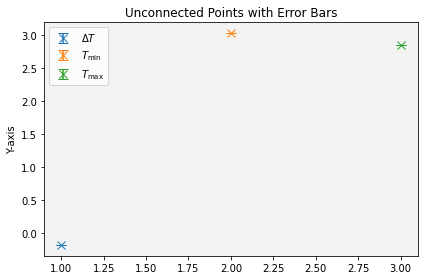

In [212]:
#Plot

# Data for the points
pos = np.array([1, 2, 3])
slope = np.array([paramet_fit_month4_lat8025[0] , paramet_fit_month4_lat8025_minTemP[0], paramet_fit_month4_lat8025_maxTemP[0]])*50

# Error bars for the points
x_err = None
y_err = np.array([cov_month4_lat8025[0,0], cov_month4_lat8025_MinTemp[0,0], cov_month4_lat8025_MaxTemp[0,0]])*2.5

# cov_month4_lat8025_MinTemp
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the points with error bars
ax.errorbar(pos[0], slope[0], xerr=x_err, yerr=y_err[0], fmt='x', markersize=8, capsize=5, label='$\Delta T$')
ax.errorbar(pos[1], slope[1], xerr=x_err, yerr=y_err[1], fmt='x', markersize=8, capsize=5, label='$T_{\mathrm{min}}$')
ax.errorbar(pos[2], slope[2], xerr=x_err, yerr=y_err[2], fmt='x', markersize=8, capsize=5, label='$T_{\mathrm{max}}$')
# Add labels and title
# ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Unconnected Points with Error Bars')

# Add legend
ax.legend()

# Add a subtle background color
plt.gca().set_facecolor((0.95, 0.95, 0.95))

# Display the plot
plt.tight_layout()
plt.show()

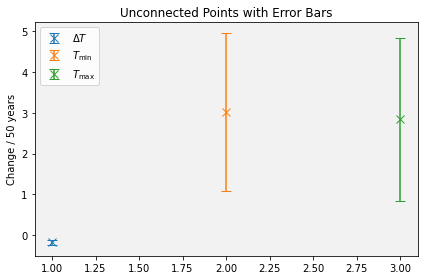

In [213]:
#Plot

# Data for the points
pos = np.array([1, 2, 3])
slope = np.array([paramet_fit_month4_lat8025[0] , paramet_fit_month4_lat8025_minTemP[0], paramet_fit_month4_lat8025_maxTemP[0]])*50

# Error bars for the points
x_err = None
y_err = np.array([VarDeltaT, VarTMin, VarTMax])

# cov_month4_lat8025_MinTemp
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the points with error bars
ax.errorbar(pos[0], slope[0], xerr=x_err, yerr=y_err[0], fmt='x', markersize=8, capsize=5, label='$\Delta T$')
ax.errorbar(pos[1], slope[1], xerr=x_err, yerr=y_err[1], fmt='x', markersize=8, capsize=5, label='$T_{\mathrm{min}}$')
ax.errorbar(pos[2], slope[2], xerr=x_err, yerr=y_err[2], fmt='x', markersize=8, capsize=5, label='$T_{\mathrm{max}}$')
# Add labels and title
# ax.set_xlabel('X-axis')
ax.set_ylabel('Change / 50 years')

ax.set_title('Fitted 50 year trends')

# Add legend
ax.legend()

# Add a subtle background color
plt.gca().set_facecolor((0.95, 0.95, 0.95))

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# SNR

y_err = np.array([VarDeltaT, VarTMin, VarTMax])
slope = np.array([paramet_fit_month4_lat8025[0] , paramet_fit_month4_lat8025_minTemP[0], paramet_fit_month4_lat8025_maxTemP[0]])*50


### Hearmap

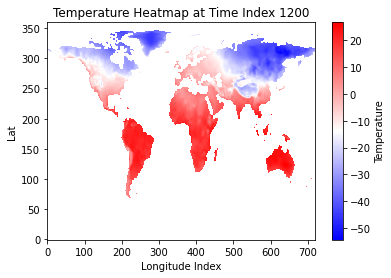

In [188]:
time_index = 1200
temperature_data = TMin.isel(time=time_index).tmn#,lon = range(0,260), lat = range(330,360)).tmn

plt.imshow(temperature_data, cmap='bwr', origin='lower', aspect='auto')
plt.colorbar(label='Temperature')
plt.title(f'Temperature Heatmap at Time Index {time_index}')
plt.xlabel('Longitude Index')
plt.ylabel('Lat')
plt.show()